# 맵핑 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

약국 = pd.read_csv("전라북도 전주시_약국_20220630.csv", encoding='EUC-KR')
의원 = pd.read_csv('전라북도 전주시_의원_20220630.csv', encoding='EUC-KR')
병원 = pd.read_csv('전북특별자치도_전주시_병원_20240117.csv', encoding='EUC-KR')
약국 = 약국[['사업장명', '위도', '경도']]
의원 = 의원[['사업장명', '위도', '경도']]
병원 = 병원[['사업장명', '위도', '경도']]

In [11]:
의원

,사업장명,위도,경도
0,(사)대한산업보건협회전북산업보건센타 전북의원,35.868399,127.073888
1,(사)인구보건복지협회전북지회가족보건의원,35.844851,127.147732
2,(사)인구보건복지협회전북지회가족치과의원,35.844851,127.147732
3,(사)한국건강관리협회 건강치과의원,35.841159,127.121621
4,(사)한국건강관리협회건강증진의원,35.841159,127.121621
...,...,...,...
1000,휴먼사랑한의원,35.809128,127.096515
1001,휴먼치과의원,35.813389,127.101638
1002,휴부부치과의원,35.834168,127.099547
1003,희망가정의학과의원,35.803831,127.149659


In [16]:
버스 = pd.read_csv('전북특별자치도_전주시_버스정류장 현황_20240117 (1).csv', encoding='EUC-KR')
버스 = 버스[['정류장ID', '위도', '경도']]
버스

,정류장ID,위도,경도
0,JUB312100690,35.820431,127.007781
1,JUB312100693,35.820713,127.007970
2,JUB306101433,35.874691,127.055197
3,JUB305100683,35.819997,127.146407
4,JUB305032322,35.845972,127.082964
...,...,...,...
2789,JUB305100431,35.799576,127.150543
2790,JUB305100460,35.801901,127.150376
2791,JUB305100463,35.802335,127.150055
2792,JUB306100817,35.828120,127.141920


# 행정동 맵핑

## 버스정류장

In [25]:
import requests
from urllib.parse import urlparse
import numpy as np
import pandas as pd
import geopandas
import re

import warnings
warnings.filterwarnings(action='ignore')

In [39]:
XY = np.array([list(i) for i in zip(버스['경도'], 버스['위도'])])
XY

array([[127.0077811 ,  35.82043092],
       [127.00797   ,  35.82071324],
       [127.0551973 ,  35.87469125],
       ...,
       [127.1500551 ,  35.80233492],
       [127.1419199 ,  35.82811986],
       [127.14684   ,  35.81917719]])

In [101]:
# 행정동 / 법정동 검색 함수 정의
def region_name(xy_list):
    url = f"https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={xy_list[0]}&y={xy_list[1]}"
    result = requests.get(urlparse(url).geturl(),
                          headers={"Authorization":"KakaoAK bfc82b27f2ff0c486eb0aab67d7174b8"})
    json_obj = result.json()

    val = []

    for document in json_obj['documents']:
        
        if document['region_type'] == 'H':
          val = [document['region_type'], document['region_3depth_name'], document['x'], document['y']]
    
    return val

In [102]:
# 행정동 / 법정동 검색 함수 반복 적용
list1 = []
for i in range(len(XY)):
    a = XY[i]
    list1.append(region_name(a))

In [103]:
list1

[['H', '이서면', 127.02323213842537, 35.829306589452706],
 ['H', '이서면', 127.02323213842537, 35.829306589452706],
 ['H', '조촌동', 127.06923543667864, 35.874481467264005],
 ['H', '풍남동', 127.14809535749636, 35.81705780419924],
 ['H', '혁신동', 127.06199485852899, 35.830817776855476],
 ['H', '혁신동', 127.06199485852899, 35.830817776855476],
 ['H', '덕진동', 127.1206693597152, 35.84534832665189],
 ['H', '덕진동', 127.1206693597152, 35.84534832665189],
 ['H', '서신동', 127.11530885786254, 35.83108488048954],
 ['H', '봉동읍', 127.16580283609825, 35.94168487228855],
 ['H', '봉동읍', 127.16580283609825, 35.94168487228855],
 ['H', '혁신동', 127.06199485852899, 35.830817776855476],
 ['H', '혁신동', 127.06199485852899, 35.830817776855476],
 ['H', '고산면', 127.20503666746048, 35.97631833265708],
 ['H', '동상면', 127.29677424291704, 35.93689387671698],
 ['H', '고산면', 127.20503666746048, 35.97631833265708],
 ['H', '운암면', 127.16044011515349, 35.66064604946473],
 ['H', '운암면', 127.16044011515349, 35.66064604946473],
 ['H', '덕진동', 127.12066

In [104]:
버스2 = pd.DataFrame(list1, columns=['H/B', '행정동', '행정동_경도', '행정동_위도'])
버스2

,H/B,행정동,행정동_경도,행정동_위도
0,H,이서면,127.023232,35.829307
1,H,이서면,127.023232,35.829307
2,H,조촌동,127.069235,35.874481
3,H,풍남동,127.148095,35.817058
4,H,혁신동,127.061995,35.830818
...,...,...,...,...
2789,H,서서학동,127.148698,35.805766
2790,H,서서학동,127.148698,35.805766
2791,H,서서학동,127.148698,35.805766
2792,H,진북동,127.131418,35.827943


In [105]:
버스3 = pd.concat([버스, 버스2], axis=1)
print(버스3.shape)
버스3.head()

(2794, 7)


,정류장ID,위도,경도,H/B,행정동,행정동_경도,행정동_위도
0,JUB312100690,35.820431,127.007781,H,이서면,127.023232,35.829307
1,JUB312100693,35.820713,127.007970,H,이서면,127.023232,35.829307
2,JUB306101433,35.874691,127.055197,H,조촌동,127.069235,35.874481
3,JUB305100683,35.819997,127.146407,H,풍남동,127.148095,35.817058
4,JUB305032322,35.845972,127.082964,H,혁신동,127.061995,35.830818


In [108]:
버스3['H/B'].value_counts()

H/B
H    2794
Name: count, dtype: int64

In [109]:
버스3 = 버스3.drop('H/B', axis=1)
버스3.head()

,정류장ID,위도,경도,행정동,행정동_경도,행정동_위도
0,JUB312100690,35.820431,127.007781,이서면,127.023232,35.829307
1,JUB312100693,35.820713,127.007970,이서면,127.023232,35.829307
2,JUB306101433,35.874691,127.055197,조촌동,127.069235,35.874481
3,JUB305100683,35.819997,127.146407,풍남동,127.148095,35.817058
4,JUB305032322,35.845972,127.082964,혁신동,127.061995,35.830818


In [112]:
버스3.to_csv('전주시_버스정류장_행정동추가.csv', index=False, encoding='EUC-KR')

## 병원

In [113]:
의원

,사업장명,위도,경도
0,(사)대한산업보건협회전북산업보건센타 전북의원,35.868399,127.073888
1,(사)인구보건복지협회전북지회가족보건의원,35.844851,127.147732
2,(사)인구보건복지협회전북지회가족치과의원,35.844851,127.147732
3,(사)한국건강관리협회 건강치과의원,35.841159,127.121621
4,(사)한국건강관리협회건강증진의원,35.841159,127.121621
...,...,...,...
1000,휴먼사랑한의원,35.809128,127.096515
1001,휴먼치과의원,35.813389,127.101638
1002,휴부부치과의원,35.834168,127.099547
1003,희망가정의학과의원,35.803831,127.149659


In [114]:
병원

,사업장명,위도,경도
0,가람한방병원,35.852438,127.120224
1,나은요양병원,35.864427,127.080650
2,누가한방병원,35.835934,127.150924
3,다사랑병원,35.800878,127.127854
4,대자인병원,35.845991,127.153316
...,...,...,...
65,해맑은요양병원,35.820764,127.146882
66,행복한요양병원,35.844096,127.145958
67,효사랑가족요양병원,35.806705,127.118834
68,효사랑전주요양병원,35.826439,127.144105


In [115]:
약국

,사업장명,위도,경도
0,21세기건강약국,35.850648,127.119542
1,21세기종합약국,35.838020,127.132837
2,365일박사약국,35.838977,127.059912
3,가나약국,35.814672,127.124265
4,감초당약국,35.815488,127.141915
...,...,...,...
390,휴베이스효천약국,35.802419,127.099302
391,휴약국,35.786171,127.129261
392,휴플러스약국,35.836919,127.155155
393,희망약국,35.796022,127.134779


In [118]:
medical = pd.concat([의원, 병원, 약국], axis = 0)
medical

,사업장명,위도,경도
0,(사)대한산업보건협회전북산업보건센타 전북의원,35.868399,127.073888
1,(사)인구보건복지협회전북지회가족보건의원,35.844851,127.147732
2,(사)인구보건복지협회전북지회가족치과의원,35.844851,127.147732
3,(사)한국건강관리협회 건강치과의원,35.841159,127.121621
4,(사)한국건강관리협회건강증진의원,35.841159,127.121621
...,...,...,...
390,휴베이스효천약국,35.802419,127.099302
391,휴약국,35.786171,127.129261
392,휴플러스약국,35.836919,127.155155
393,희망약국,35.796022,127.134779


In [119]:
XY = np.array([list(i) for i in zip(medical['경도'], medical['위도'])])
XY

array([[127.0738885 ,  35.86839875],
       [127.1477319 ,  35.8448508 ],
       [127.1477319 ,  35.8448508 ],
       ...,
       [127.1551551 ,  35.83691859],
       [127.1347789 ,  35.79602215],
       [127.1247142 ,  35.84263998]])

In [120]:
# 행정동 / 법정동 검색 함수 반복 적용
list1 = []
for i in range(len(XY)):
    a = XY[i]
    list1.append(region_name(a))

In [121]:
list1

[['H', '여의동', 127.07335062644708, 35.86039784044521],
 ['H', '인후2동', 127.14635788151818, 35.8398509610127],
 ['H', '인후2동', 127.14635788151818, 35.8398509610127],
 ['H', '덕진동', 127.1206693597152, 35.84534832665189],
 ['H', '덕진동', 127.1206693597152, 35.84534832665189],
 ['H', '노송동', 127.15838306693938, 35.82439175838004],
 ['H', '평화2동', 127.13528499312795, 35.79557599988072],
 ['H', '중화산1동', 127.12485408642968, 35.81458589540723],
 ['H', '평화2동', 127.13528499312795, 35.79557599988072],
 ['H', '효자4동', 127.0893342066832, 35.80979398669165],
 ['H', '효자5동', 127.097232100411, 35.82621603923424],
 ['H', '인후3동', 127.16131215748621, 35.82812267948797],
 ['H', '효자2동', 127.11958447334263, 35.80692692417217],
 ['H', '풍남동', 127.14809535749636, 35.81705780419924],
 ['H', '효자5동', 127.097232100411, 35.82621603923424],
 ['H', '서신동', 127.11530885786254, 35.83108488048954],
 ['H', '서신동', 127.11530885786254, 35.83108488048954],
 ['H', '중화산2동', 127.11640625438872, 35.821656650266334],
 ['H', '덕진동', 127.12066

In [122]:
medical2 = pd.DataFrame(list1, columns=['H/B', '행정동', '행정동_경도', '행정동_위도'])
medical2

,H/B,행정동,행정동_경도,행정동_위도
0,H,여의동,127.073351,35.860398
1,H,인후2동,127.146358,35.839851
2,H,인후2동,127.146358,35.839851
3,H,덕진동,127.120669,35.845348
4,H,덕진동,127.120669,35.845348
...,...,...,...,...
1465,H,효자4동,127.089334,35.809794
1466,H,평화2동,127.135285,35.795576
1467,H,인후1동,127.156691,35.837451
1468,H,평화2동,127.135285,35.795576


In [125]:
medical.reset_index(drop=True, inplace=True)
medical2.reset_index(drop=True, inplace=True)
medical3 = pd.concat([medical, medical2], axis=1)
print(medical3.shape)
medical3.head()

(1470, 7)


,사업장명,위도,경도,H/B,행정동,행정동_경도,행정동_위도
0,(사)대한산업보건협회전북산업보건센타 전북의원,35.868399,127.073888,H,여의동,127.073351,35.860398
1,(사)인구보건복지협회전북지회가족보건의원,35.844851,127.147732,H,인후2동,127.146358,35.839851
2,(사)인구보건복지협회전북지회가족치과의원,35.844851,127.147732,H,인후2동,127.146358,35.839851
3,(사)한국건강관리협회 건강치과의원,35.841159,127.121621,H,덕진동,127.120669,35.845348
4,(사)한국건강관리협회건강증진의원,35.841159,127.121621,H,덕진동,127.120669,35.845348


In [126]:
medical3['H/B'].value_counts()

H/B
H    1470
Name: count, dtype: int64

In [127]:
medical3 = medical3.drop('H/B', axis=1)
medical3.head()

,사업장명,위도,경도,행정동,행정동_경도,행정동_위도
0,(사)대한산업보건협회전북산업보건센타 전북의원,35.868399,127.073888,여의동,127.073351,35.860398
1,(사)인구보건복지협회전북지회가족보건의원,35.844851,127.147732,인후2동,127.146358,35.839851
2,(사)인구보건복지협회전북지회가족치과의원,35.844851,127.147732,인후2동,127.146358,35.839851
3,(사)한국건강관리협회 건강치과의원,35.841159,127.121621,덕진동,127.120669,35.845348
4,(사)한국건강관리협회건강증진의원,35.841159,127.121621,덕진동,127.120669,35.845348


In [128]:
medical3.to_csv('전주시_의료인프라_행정동추가.csv', index=False, encoding='EUC-KR')

# 클러스터링

## 데이터 파일 만들기

### 지도 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import missingno
import folium # 지도시각화
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

인프라 = pd.read_csv('전주시_의료인프라_행정동추가.csv', encoding='EUC-KR')
버스 = pd.read_csv('전주시_버스정류장_행정동추가.csv', encoding='EUC-KR')
인프라.info()
인프라.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업장명    1470 non-null   object 
 1   위도      1470 non-null   float64
 2   경도      1470 non-null   float64
 3   행정동     1470 non-null   object 
 4   행정동_경도  1470 non-null   float64
 5   행정동_위도  1470 non-null   float64
dtypes: float64(4), object(2)
memory usage: 69.0+ KB


,사업장명,위도,경도,행정동,행정동_경도,행정동_위도
0,(사)대한산업보건협회전북산업보건센타 전북의원,35.868399,127.073888,여의동,127.073351,35.860398
1,(사)인구보건복지협회전북지회가족보건의원,35.844851,127.147732,인후2동,127.146358,35.839851
2,(사)인구보건복지협회전북지회가족치과의원,35.844851,127.147732,인후2동,127.146358,35.839851
3,(사)한국건강관리협회 건강치과의원,35.841159,127.121621,덕진동,127.120669,35.845348
4,(사)한국건강관리협회건강증진의원,35.841159,127.121621,덕진동,127.120669,35.845348


In [2]:
버스.info()
버스.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   정류장ID   2794 non-null   object 
 1   위도      2794 non-null   float64
 2   경도      2794 non-null   float64
 3   행정동     2794 non-null   object 
 4   행정동_경도  2794 non-null   float64
 5   행정동_위도  2794 non-null   float64
dtypes: float64(4), object(2)
memory usage: 131.1+ KB


,정류장ID,위도,경도,행정동,행정동_경도,행정동_위도
0,JUB312100690,35.820431,127.007781,이서면,127.023232,35.829307
1,JUB312100693,35.820713,127.007970,이서면,127.023232,35.829307
2,JUB306101433,35.874691,127.055197,조촌동,127.069235,35.874481
3,JUB305100683,35.819997,127.146407,풍남동,127.148095,35.817058
4,JUB305032322,35.845972,127.082964,혁신동,127.061995,35.830818


In [3]:
print(버스['행정동_경도'].max(), 버스['행정동_경도'].min(), 버스['행정동_위도'].max(), 버스['행정동_위도'].min())

127.36033286443649 126.91291236327184 36.136824367339614 35.66064604946473


In [4]:
print(인프라['행정동_경도'].max(), 인프라['행정동_경도'].min(), 인프라['행정동_위도'].max(), 인프라['행정동_위도'].min())

127.16704285081134 127.061994858529 35.874481467264005 35.79557599988072


In [18]:
location = 버스[['경도', '위도']]
location

,경도,위도
0,127.007781,35.820431
1,127.007970,35.820713
2,127.055197,35.874691
3,127.146407,35.819997
4,127.082964,35.845972
...,...,...
2789,127.150543,35.799576
2790,127.150376,35.801901
2791,127.150055,35.802335
2792,127.141920,35.828120


In [15]:
map= folium.Map(location=[location['위도'].mean() , location['경도'].mean()], zoom_start=12.5)
# 위치 데이터프레임에 빨간 점 추가
for i in location.index:
    folium.CircleMarker(
        location=[location.loc[i, '위도'], location.loc[i, '경도']],
        radius=0.1,  # 원의 반지름
        color='red',  # 원의 외곽선 색상
        fill=True,  # 원 내부 채우기
        fill_color='red'  # 원 내부 색상
    ).add_to(map)
    
map

In [17]:
location_inf = 인프라[['경도', '위도']]
location_inf

,경도,위도
0,127.073888,35.868399
1,127.147732,35.844851
2,127.147732,35.844851
3,127.121621,35.841159
4,127.121621,35.841159
...,...,...
1465,127.099302,35.802419
1466,127.129261,35.786171
1467,127.155155,35.836919
1468,127.134779,35.796022


In [19]:
map= folium.Map(location=[location_inf['위도'].mean() , location_inf['경도'].mean()], zoom_start=12.5)
# 위치 데이터프레임에 빨간 점 추가
for i in location_inf.index:
    folium.CircleMarker(
        location=[location_inf.loc[i, '위도'], location_inf.loc[i, '경도']],
        radius=0.1,  # 원의 반지름
        color='red',  # 원의 외곽선 색상
        fill=True,  # 원 내부 채우기
        fill_color='red'  # 원 내부 색상
    ).add_to(map)
    
map

In [20]:
버스

,정류장ID,위도,경도,행정동,행정동_경도,행정동_위도
0,JUB312100690,35.820431,127.007781,이서면,127.023232,35.829307
1,JUB312100693,35.820713,127.007970,이서면,127.023232,35.829307
2,JUB306101433,35.874691,127.055197,조촌동,127.069235,35.874481
3,JUB305100683,35.819997,127.146407,풍남동,127.148095,35.817058
4,JUB305032322,35.845972,127.082964,혁신동,127.061995,35.830818
...,...,...,...,...,...,...
2789,JUB305100431,35.799576,127.150543,서서학동,127.148698,35.805766
2790,JUB305100460,35.801901,127.150376,서서학동,127.148698,35.805766
2791,JUB305100463,35.802335,127.150055,서서학동,127.148698,35.805766
2792,JUB306100817,35.828120,127.141920,진북동,127.131418,35.827943


### 버스/안프라 데이터 정리

In [27]:
동별버스 = pd.DataFrame(버스['행정동'].value_counts())
동별버스= 동별버스.reset_index()
동별버스.columns=['동' ,'정류장수']
동별버스.head()

,동,정류장수
0,봉동읍,199
1,소양면,164
2,구이면,135
3,조촌동,122
4,이서면,121


In [28]:
동별인프라 = pd.DataFrame(인프라['행정동'].value_counts())
동별인프라= 동별인프라.reset_index()
동별인프라.columns=['동','병원수']
동별인프라.head()

,동,병원수
0,서신동,117
1,효자5동,107
2,송천1동,106
3,평화2동,86
4,효자4동,66


In [91]:
# 버스정류장은 전주 이외의 동에도 데이터가 존재 -> 전주시는 35행정동으로 구성
df = pd.merge(동별버스, 동별인프라, on='동')
df.head()

,동,정류장수,병원수
0,조촌동,122,16
1,삼천3동,99,21
2,혁신동,91,38
3,송천2동,81,58
4,여의동,68,30


### 인구 데이터 정리

In [43]:
인구 = pd.read_csv('전북특별자치도 전주시_인구현황_20240503.csv', encoding='EUC-KR')
인구 =  인구[['구분', '세대수', '인구수(계)', '18세이상인구수(계)', '65세이상인구수(계)']]
인구.head()

,구분,세대수,인구수(계),18세이상인구수(계),65세이상인구수(계)
0,중앙동,4905,9695,8544,2499
1,풍남동,2275,3612,3432,1449
2,노송동,5495,10457,9491,3244
3,완산동,2604,4898,4421,1584
4,동서학동,3109,5847,5371,2050


In [44]:
인구['18세미만 인구수'] = 인구['인구수(계)'] - 인구['18세이상인구수(계)']
인구.head()

,구분,세대수,인구수(계),18세이상인구수(계),65세이상인구수(계),18세미만 인구수
0,중앙동,4905,9695,8544,2499,1151
1,풍남동,2275,3612,3432,1449,180
2,노송동,5495,10457,9491,3244,966
3,완산동,2604,4898,4421,1584,477
4,동서학동,3109,5847,5371,2050,476


In [58]:
인구.columns = ['동', '세대수', '인구수','18세이상인구수', '65세이상인구수', '18세미만인구수']
인구.head()

,동,세대수,인구수,18세이상인구수,65세이상인구수,18세미만인구수
0,중앙동,4905,9695,8544,2499,1151
1,풍남동,2275,3612,3432,1449,180
2,노송동,5495,10457,9491,3244,966
3,완산동,2604,4898,4421,1584,477
4,동서학동,3109,5847,5371,2050,476


In [76]:
수급자 = pd.read_csv('전북특별자치도 전주시_기초생활수급자 수_20221231 (1).csv', encoding='EUC-KR')
수급자 = 수급자[2:]
수급자.reset_index(drop=True, inplace=True)
수급자['수급권자수'] = 수급자['일반수급자 수급권자수'] + 수급자['시설수급자 수급권자수'] + 수급자['조건부수급자 수급권자수'] + 수급자['특례수급자 수급권자수']
수급자['수급자 가구수'] = 수급자['일반수급자 가구수'] + 수급자['조건부수급자 가구수'] + 수급자['시설수급자 가구수'] + 수급자['특례수급자 가구수']
수급자 = 수급자[['행정동 구분', '수급권자수', '수급자 가구수']]
수급자['동'] = 수급자['행정동 구분'].str[7:]
수급자 = 수급자[['동','수급권자수', '수급자 가구수' ]]
수급자

,동,수급권자수,수급자 가구수
0,중앙동,534,411
1,풍남동,367,297
2,노송동,896,662
3,완산동,627,472
4,동서학동,603,425
5,서서학동,1091,748
6,중화산1동,636,418
7,중화산2동,1043,716
8,서신동,1678,982
9,평화1동,2893,2270


In [77]:
수급자 = 수급자.drop(index=33)
수급자.reset_index(drop=True, inplace=True)
수급자 # 동산동은 수급자 1명이고, 인구 데이터에는 없는 행정동이라서 삭제

,동,수급권자수,수급자 가구수
0,중앙동,534,411
1,풍남동,367,297
2,노송동,896,662
3,완산동,627,472
4,동서학동,603,425
5,서서학동,1091,748
6,중화산1동,636,418
7,중화산2동,1043,716
8,서신동,1678,982
9,평화1동,2893,2270


In [89]:
peo = 인구.merge(수급자, left_index=True, right_index=True)
peo

,동_x,세대수,인구수,18세이상인구수,65세이상인구수,18세미만인구수,동_y,수급권자수,수급자 가구수
0,중앙동,4905,9695,8544,2499,1151,중앙동,534,411
1,풍남동,2275,3612,3432,1449,180,풍남동,367,297
2,노송동,5495,10457,9491,3244,966,노송동,896,662
3,완산동,2604,4898,4421,1584,477,완산동,627,472
4,동서학동,3109,5847,5371,2050,476,동서학동,603,425
5,서서학동,4305,7950,7366,2637,584,서서학동,1091,748
6,중화산1동,6323,13506,11918,3001,1588,중화산1동,636,418
7,중화산2동,9250,19060,16126,2494,2934,중화산2동,1043,716
8,서신동,17521,39149,33099,5692,6050,서신동,1678,982
9,평화1동,7028,11956,11021,3878,935,평화1동,2893,2270


In [90]:
peo = peo[['동_x', '세대수', '인구수', '65세이상인구수', '18세미만인구수', '수급권자수', '수급자 가구수']]
peo.columns = ['동', '세대수', '인구수', '65세이상인구수', '18세미만인구수', '수급권자수', '수급자 가구수']
peo.head()

,동,세대수,인구수,65세이상인구수,18세미만인구수,수급권자수,수급자 가구수
0,중앙동,4905,9695,2499,1151,534,411
1,풍남동,2275,3612,1449,180,367,297
2,노송동,5495,10457,3244,966,896,662
3,완산동,2604,4898,1584,477,627,472
4,동서학동,3109,5847,2050,476,603,425


In [99]:
data = pd.merge(df, peo, on='동')
data

,동,정류장수,병원수,세대수,인구수,65세이상인구수,18세미만인구수,수급권자수,수급자 가구수
0,조촌동,122,16,6248,12064,2713,1435,1288,973
1,삼천3동,99,21,9145,20813,4104,2807,858,564
2,혁신동,91,38,13005,35929,2006,9802,94,53
3,송천2동,81,58,10569,25234,4358,3825,1096,680
4,여의동,68,30,7131,15946,2962,2331,1185,689
5,효자4동,68,66,16704,38615,4213,7543,2250,1393
6,평화2동,66,86,18583,43410,8287,6802,2951,2044
7,동서학동,63,3,3109,5847,2050,476,603,425
8,효자5동,54,107,18501,36192,2513,5179,1600,869
9,우아2동,54,16,7685,13926,2661,1414,1319,911


In [100]:
# data.to_csv('최종data.csv', encoding='EUC-KR')

## FINCH 클러스터링 실시

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import missingno
import folium # 지도시각화
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('최종data.csv', encoding='EUC-KR', index_col=0)
data.head()

,동,정류장수,병원수,세대수,인구수,65세이상인구수,18세미만인구수,수급권자수,수급자 가구수
0,조촌동,122,16,6248,12064,2713,1435,1288,973
1,삼천3동,99,21,9145,20813,4104,2807,858,564
2,혁신동,91,38,13005,35929,2006,9802,94,53
3,송천2동,81,58,10569,25234,4358,3825,1096,680
4,여의동,68,30,7131,15946,2962,2331,1185,689


In [162]:
data = data[['동', '정류장수', '병원수', '인구수', '65세이상인구수', '18세미만인구수', '수급권자수']]
data.head()

,동,정류장수,병원수,인구수,65세이상인구수,18세미만인구수,수급권자수
0,조촌동,122,16,12064,2713,1435,1288
1,삼천3동,99,21,20813,4104,2807,858
2,혁신동,91,38,35929,2006,9802,94
3,송천2동,81,58,25234,4358,3825,1096
4,여의동,68,30,15946,2962,2331,1185


In [163]:
data['인구 대비 병원 비율'] = data['인구수']/data['병원수']
data.head()

,동,정류장수,병원수,인구수,65세이상인구수,18세미만인구수,수급권자수,인구 대비 병원 비율
0,조촌동,122,16,12064,2713,1435,1288,754.000000
1,삼천3동,99,21,20813,4104,2807,858,991.095238
2,혁신동,91,38,35929,2006,9802,94,945.500000
3,송천2동,81,58,25234,4358,3825,1096,435.068966
4,여의동,68,30,15946,2962,2331,1185,531.533333


In [164]:
data.set_index('동', inplace=True)
data

,정류장수,병원수,인구수,65세이상인구수,18세미만인구수,수급권자수,인구 대비 병원 비율
동,,,,,,,
조촌동,122,16,12064,2713,1435,1288,754.000000
삼천3동,99,21,20813,4104,2807,858,991.095238
혁신동,91,38,35929,2006,9802,94,945.500000
송천2동,81,58,25234,4358,3825,1096,435.068966
여의동,68,30,15946,2962,2331,1185,531.533333
효자4동,68,66,38615,4213,7543,2250,585.075758
평화2동,66,86,43410,8287,6802,2951,504.767442
동서학동,63,3,5847,2050,476,603,1949.000000
효자5동,54,107,36192,2513,5179,1600,338.242991


In [165]:
data['노인비율'] = data['65세이상인구수'] / data['인구수']
data['아동청소년비율'] = data['18세미만인구수'] / data['인구수']
data['수급자비율'] = data['수급권자수'] / data['인구수']
data.head

<bound method NDFrame.head of        정류장수  병원수    인구수  65세이상인구수  18세미만인구수  수급권자수  인구 대비 병원 비율      노인비율  \
동                                                                           
조촌동     122   16  12064      2713      1435   1288   754.000000  0.224884   
삼천3동     99   21  20813      4104      2807    858   991.095238  0.197184   
혁신동      91   38  35929      2006      9802     94   945.500000  0.055832   
송천2동     81   58  25234      4358      3825   1096   435.068966  0.172703   
여의동      68   30  15946      2962      2331   1185   531.533333  0.185752   
효자4동     68   66  38615      4213      7543   2250   585.075758  0.109103   
평화2동     66   86  43410      8287      6802   2951   504.767442  0.190901   
동서학동     63    3   5847      2050       476    603  1949.000000  0.350607   
효자5동     54  107  36192      2513      5179   1600   338.242991  0.069435   
우아2동     54   16  13926      2661      1414   1319   870.375000  0.191081   
덕진동      48   60  20590      3142      2983   

In [166]:
data.columns

Index(['정류장수', '병원수', '인구수', '65세이상인구수', '18세미만인구수', '수급권자수', '인구 대비 병원 비율',
       '노인비율', '아동청소년비율', '수급자비율'],
      dtype='object')

In [167]:
data = data[['정류장수', '병원수', '인구수', '인구 대비 병원 비율', '노인비율', '아동청소년비율', '수급자비율']]
data.head()

,정류장수,병원수,인구수,인구 대비 병원 비율,노인비율,아동청소년비율,수급자비율
동,,,,,,,
조촌동,122,16,12064,754.000000,0.224884,0.118949,0.106764
삼천3동,99,21,20813,991.095238,0.197184,0.134868,0.041224
혁신동,91,38,35929,945.500000,0.055832,0.272816,0.002616
송천2동,81,58,25234,435.068966,0.172703,0.151581,0.043433
여의동,68,30,15946,531.533333,0.185752,0.146181,0.074313


In [168]:
data.sort_values(by='인구 대비 병원 비율', ascending=False)

,정류장수,병원수,인구수,인구 대비 병원 비율,노인비율,아동청소년비율,수급자비율
동,,,,,,,
동서학동,63,3,5847,1949.000000,0.350607,0.081409,0.103130
팔복동,40,7,7492,1070.285714,0.283903,0.070475,0.142152
삼천3동,99,21,20813,991.095238,0.197184,0.134868,0.041224
혁신동,91,38,35929,945.500000,0.055832,0.272816,0.002616
우아2동,54,16,13926,870.375000,0.191081,0.101537,0.094715
조촌동,122,16,12064,754.000000,0.224884,0.118949,0.106764
호성동,47,26,18707,719.500000,0.202598,0.146737,0.036778
완산동,6,7,4898,699.714286,0.323397,0.097387,0.128011
송천1동,44,106,64805,611.367925,0.085842,0.234179,0.017854


In [169]:
data['정류장수'].sum()

1338

In [170]:
data['정류장비율'] = data['정류장수']/1338
data.head()

C:\Users\qwe54\AppData\Local\Temp\ipykernel_1140\2301802598.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,정류장수,병원수,인구수,인구 대비 병원 비율,노인비율,아동청소년비율,수급자비율,정류장비율
동,,,,,,,,
조촌동,122,16,12064,754.000000,0.224884,0.118949,0.106764,0.091181
삼천3동,99,21,20813,991.095238,0.197184,0.134868,0.041224,0.073991
혁신동,91,38,35929,945.500000,0.055832,0.272816,0.002616,0.068012
송천2동,81,58,25234,435.068966,0.172703,0.151581,0.043433,0.060538
여의동,68,30,15946,531.533333,0.185752,0.146181,0.074313,0.050822


In [171]:
data = data[['인구수', '인구 대비 병원 비율', '노인비율', '아동청소년비율', '수급자비율', '정류장비율']]
data

,인구수,인구 대비 병원 비율,노인비율,아동청소년비율,수급자비율,정류장비율
동,,,,,,
조촌동,12064,754.000000,0.224884,0.118949,0.106764,0.091181
삼천3동,20813,991.095238,0.197184,0.134868,0.041224,0.073991
혁신동,35929,945.500000,0.055832,0.272816,0.002616,0.068012
송천2동,25234,435.068966,0.172703,0.151581,0.043433,0.060538
여의동,15946,531.533333,0.185752,0.146181,0.074313,0.050822
효자4동,38615,585.075758,0.109103,0.195339,0.058268,0.050822
평화2동,43410,504.767442,0.190901,0.156692,0.067980,0.049327
동서학동,5847,1949.000000,0.350607,0.081409,0.103130,0.047085
효자5동,36192,338.242991,0.069435,0.143098,0.044209,0.040359


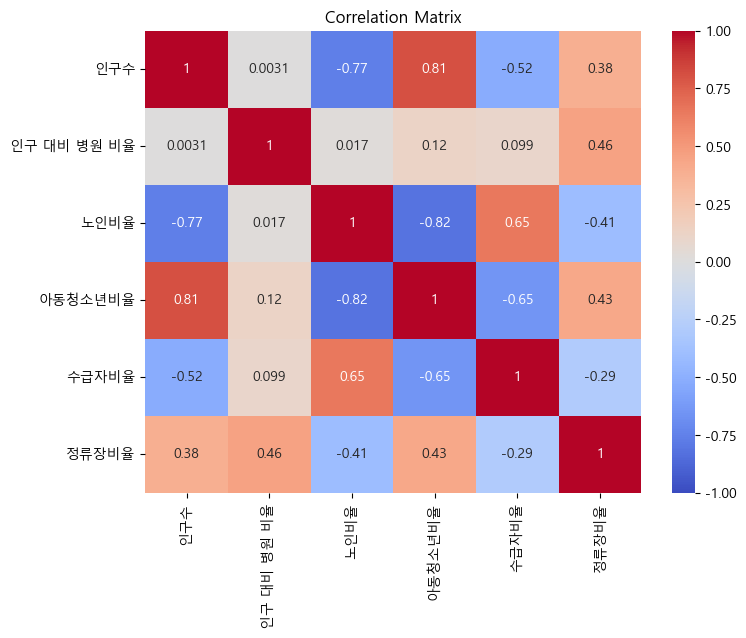

In [172]:
corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show() # 상관계수가 높은 아동청소년 비율 삭제

In [173]:
data = data[['인구수', '인구 대비 병원 비율', '노인비율', '수급자비율', '정류장비율']]
data.head()

,인구수,인구 대비 병원 비율,노인비율,수급자비율,정류장비율
동,,,,,
조촌동,12064,754.000000,0.224884,0.106764,0.091181
삼천3동,20813,991.095238,0.197184,0.041224,0.073991
혁신동,35929,945.500000,0.055832,0.002616,0.068012
송천2동,25234,435.068966,0.172703,0.043433,0.060538
여의동,15946,531.533333,0.185752,0.074313,0.050822


In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 클러스터 열을 제외한 나머지 데이터만 스케일링
scaled_data = scaler.fit_transform(data)

# 스케일링된 데이터를 DataFrame으로 변환
scaled_data_df = pd.DataFrame(scaled_data, columns=['인구수', '인구 대비 병원 비율', '노인비율', '수급자비율', '정류장비율'])

scaled_data_df.head()

,인구수,인구 대비 병원 비율,노인비율,수급자비율,정류장비율
0,-0.473825,0.658071,0.033904,0.662383,2.923380
1,0.192103,1.360833,-0.304003,-0.843858,2.120747
2,1.342652,1.225686,-2.028361,-1.731152,1.841570
3,0.528606,-0.287256,-0.602647,-0.793086,1.492599
4,-0.178348,-0.001331,-0.443469,-0.083401,1.038937


In [175]:
scaled_data_df = scaled_data_df[['인구 대비 병원 비율', '노인비율', '수급자비율']]
scaled_data_df

,인구 대비 병원 비율,노인비율,수급자비율
0,0.658071,0.033904,0.662383
1,1.360833,-0.304003,-0.843858
2,1.225686,-2.028361,-1.731152
3,-0.287256,-0.602647,-0.793086
4,-0.001331,-0.443469,-0.083401
5,0.157372,-1.378515,-0.452168
6,-0.080666,-0.380658,-0.228960
7,4.200109,1.567605,0.578864
8,-0.574253,-1.862419,-0.775270
9,1.003012,-0.378454,0.385471


In [176]:
from finch import FINCH

c, num_clust, req_c = FINCH(scaled_data_df)

Partition 0: 12 clusters
Partition 1: 6 clusters


In [177]:
cluster = pd.DataFrame(c)
cluster = cluster.iloc[:, 1]
cluster.name = 'cluster'
cluster

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    1
14    0
15    2
16    1
17    3
18    2
19    4
20    2
21    1
22    1
23    5
24    1
25    1
26    2
27    3
28    5
29    1
30    4
31    4
32    5
33    4
34    5
Name: cluster, dtype: int32

In [178]:
data3 = pd.concat([scaled_data_df, cluster], axis=1)
data3

,인구 대비 병원 비율,노인비율,수급자비율,cluster
0,0.658071,0.033904,0.662383,0
1,1.360833,-0.304003,-0.843858,1
2,1.225686,-2.028361,-1.731152,1
3,-0.287256,-0.602647,-0.793086,1
4,-0.001331,-0.443469,-0.083401,1
5,0.157372,-1.378515,-0.452168,1
6,-0.080666,-0.380658,-0.228960,1
7,4.200109,1.567605,0.578864,0
8,-0.574253,-1.862419,-0.775270,1
9,1.003012,-0.378454,0.385471,0


In [179]:
import plotly.express as px
fig = px.scatter_3d(data3, x='노인비율', y='수급자비율', z='인구 대비 병원 비율', color='cluster', title='3D Scatter Plot with Clusters')
fig.show()

In [181]:
data3.index = data.index
data3

,인구 대비 병원 비율,노인비율,수급자비율,cluster
동,,,,
조촌동,0.658071,0.033904,0.662383,0
삼천3동,1.360833,-0.304003,-0.843858,1
혁신동,1.225686,-2.028361,-1.731152,1
송천2동,-0.287256,-0.602647,-0.793086,1
여의동,-0.001331,-0.443469,-0.083401,1
효자4동,0.157372,-1.378515,-0.452168,1
평화2동,-0.080666,-0.380658,-0.228960,1
동서학동,4.200109,1.567605,0.578864,0
효자5동,-0.574253,-1.862419,-0.775270,1


In [182]:
data.reset_index(drop=True, inplace=True)
data

,인구수,인구 대비 병원 비율,노인비율,수급자비율,정류장비율
0,12064,754.000000,0.224884,0.106764,0.091181
1,20813,991.095238,0.197184,0.041224,0.073991
2,35929,945.500000,0.055832,0.002616,0.068012
3,25234,435.068966,0.172703,0.043433,0.060538
4,15946,531.533333,0.185752,0.074313,0.050822
5,38615,585.075758,0.109103,0.058268,0.050822
6,43410,504.767442,0.190901,0.067980,0.049327
7,5847,1949.000000,0.350607,0.103130,0.047085
8,36192,338.242991,0.069435,0.044209,0.040359
9,13926,870.375000,0.191081,0.094715,0.040359


In [183]:
행정동 = pd.concat([data, cluster], axis=1)
행정동

,인구수,인구 대비 병원 비율,노인비율,수급자비율,정류장비율,cluster
0,12064,754.000000,0.224884,0.106764,0.091181,0
1,20813,991.095238,0.197184,0.041224,0.073991,1
2,35929,945.500000,0.055832,0.002616,0.068012,1
3,25234,435.068966,0.172703,0.043433,0.060538,1
4,15946,531.533333,0.185752,0.074313,0.050822,1
5,38615,585.075758,0.109103,0.058268,0.050822,1
6,43410,504.767442,0.190901,0.067980,0.049327,1
7,5847,1949.000000,0.350607,0.103130,0.047085,0
8,36192,338.242991,0.069435,0.044209,0.040359,1
9,13926,870.375000,0.191081,0.094715,0.040359,0


In [185]:
행정동.index = data3.index
행정동

,인구수,인구 대비 병원 비율,노인비율,수급자비율,정류장비율,cluster
동,,,,,,
조촌동,12064,754.000000,0.224884,0.106764,0.091181,0
삼천3동,20813,991.095238,0.197184,0.041224,0.073991,1
혁신동,35929,945.500000,0.055832,0.002616,0.068012,1
송천2동,25234,435.068966,0.172703,0.043433,0.060538,1
여의동,15946,531.533333,0.185752,0.074313,0.050822,1
효자4동,38615,585.075758,0.109103,0.058268,0.050822,1
평화2동,43410,504.767442,0.190901,0.067980,0.049327,1
동서학동,5847,1949.000000,0.350607,0.103130,0.047085,0
효자5동,36192,338.242991,0.069435,0.044209,0.040359,1


In [195]:
clu1 = 행정동[행정동['cluster'] == 1]
clu2 = 행정동[행정동['cluster'] == 0]
candi = pd.concat([clu1, clu2], axis=0)
candi

,인구수,인구 대비 병원 비율,노인비율,수급자비율,정류장비율,cluster
동,,,,,,
삼천3동,20813,991.095238,0.197184,0.041224,0.073991,1
혁신동,35929,945.500000,0.055832,0.002616,0.068012,1
송천2동,25234,435.068966,0.172703,0.043433,0.060538,1
여의동,15946,531.533333,0.185752,0.074313,0.050822,1
효자4동,38615,585.075758,0.109103,0.058268,0.050822,1
평화2동,43410,504.767442,0.190901,0.067980,0.049327,1
효자5동,36192,338.242991,0.069435,0.044209,0.040359,1
덕진동,20590,343.166667,0.152598,0.055367,0.035874,1
호성동,18707,719.500000,0.202598,0.036778,0.035127,1


In [196]:
candi = candi.sort_values(by='정류장비율', ascending=False)
candi = candi.iloc[:10]
candi

,인구수,인구 대비 병원 비율,노인비율,수급자비율,정류장비율,cluster
동,,,,,,
조촌동,12064,754.000000,0.224884,0.106764,0.091181,0
삼천3동,20813,991.095238,0.197184,0.041224,0.073991,1
혁신동,35929,945.500000,0.055832,0.002616,0.068012,1
송천2동,25234,435.068966,0.172703,0.043433,0.060538,1
여의동,15946,531.533333,0.185752,0.074313,0.050822,1
효자4동,38615,585.075758,0.109103,0.058268,0.050822,1
평화2동,43410,504.767442,0.190901,0.067980,0.049327,1
동서학동,5847,1949.000000,0.350607,0.103130,0.047085,0
효자5동,36192,338.242991,0.069435,0.044209,0.040359,1
